In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
import os
from openpyxl import Workbook
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglv1 import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretrainingV1 import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv10 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
tf.random.set_seed(1234)
np.random.seed(1234) 

In [2]:
designated_ukc_cls = 5
embedding_size = 12
# num_classes= 3
pt_epochs = 2
ukc_label=7
octrain_epochs = 1
lr_rate = 2.5
wait_patience = 8
optimizer = 'adam'

oset = OpenSet()

In [3]:
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=5000,
                                                          designated_ukc_cls=5)
# print(oset.tracker)
# oset.train(train_data=train_data, val_data=val_data,
#                                     test_data=test_data, bglog=bglog, manual_color_map=False,                                 
#                                    )

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 4000, val_0:, 500, test_0:, 500, train_1:, 4000, val_1:, 500, test_1:, 500, class 5 is added as ukc
ukc_5:, 165
length of train_data - (num_seq_per_cls * num_class)// batch size: 250


got all the dataset
unknown optimizer None. assigning default as adam with lr_rate=2
got all the dataset
got all the dataset
vocab_size: 50
got all the dataset
2022-04-27 08:06:47.047017
starting to create ptmodel automatically
staring pre trining
Epoch 1/6
250/250 [==============================] - ETA: 0s - loss: 0.0231 - accuracy: 0.9914 - precision: 0.9914 - recall: 0.9914
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to data\ptmodel_2022-04-27_08_06_47.047017\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-27_08_06_47.047017\assets
250/250 [==============================] - 25s 99ms/step - loss: 0.0231 - accuracy: 0.9914 - precision: 0.9914 - recall: 0.9914 - val_loss: 6.7102e-06 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 0.0010
Epoch 2/6
250/250 [==============================] - ETA: 0s - loss: 6.0385e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 2: val_accuracy did not improve from 1.00000
250/250 [

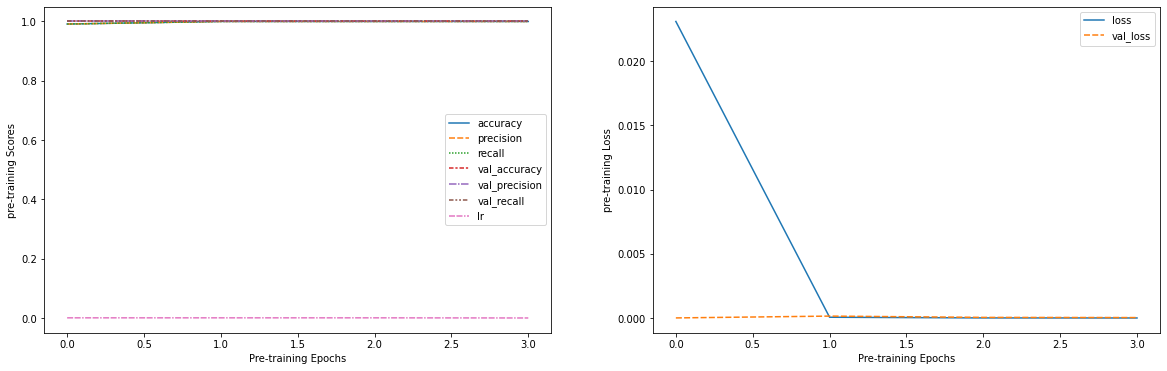

run_id:  2022-04-27_08_08_24.840538_1c7d9184c5d311ec8594ac8247733f47


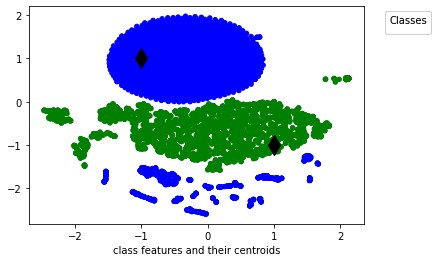

run_id:  2022-04-27_08_09_13.782674_39a98bbac5d311ecb136ac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.50it/s]


epoch: 1/50, train_loss: 5.2754411697387695, F1_train: 0.4548180455226932 F1_val: 0.47633443471744386


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:32<00:00,  7.79it/s]


epoch: 2/50, train_loss: 5.2754364013671875, F1_train: 0.4997498749374687 F1_val: 0.4928920113463949


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:32<00:00,  7.78it/s]


epoch: 3/50, train_loss: 5.275439262390137, F1_train: 0.49987496874218557 F1_val: 0.4959493017309206


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.52it/s]


epoch: 4/50, train_loss: 5.275436878204346, F1_train: 0.5 F1_val: 0.4939330974325214


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.46it/s]


epoch: 5/50, train_loss: 5.275437355041504, F1_train: 0.5 F1_val: 0.4939330974325214
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.44it/s]


epoch: 6/50, train_loss: 5.2754364013671875, F1_train: 0.5 F1_val: 0.4969574036511156


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:32<00:00,  7.80it/s]


epoch: 7/50, train_loss: 5.275440216064453, F1_train: 0.9542229499249556 F1_val: 0.9969573662470496


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.48it/s]


epoch: 8/50, train_loss: 5.2754340171813965, F1_train: 0.9542229499249556 F1_val: 0.9969573286906247
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.44it/s]


epoch: 9/50, train_loss: 5.27543830871582, F1_train: 0.9542229499249556 F1_val: 0.9969573662470496
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:32<00:00,  7.73it/s]


epoch: 10/50, train_loss: 5.275434494018555, F1_train: 0.9542229499249556 F1_val: 0.9979756753212693


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:32<00:00,  7.79it/s]


epoch: 11/50, train_loss: 5.275434970855713, F1_train: 0.9542229499249556 F1_val: 0.9969574780058651
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:31<00:00,  7.83it/s]


epoch: 12/50, train_loss: 5.2754364013671875, F1_train: 0.9542974079126875 F1_val: 0.9969575149583767


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:31<00:00,  7.88it/s]


epoch: 13/50, train_loss: 5.275437355041504, F1_train: 0.9542974079126875 F1_val: 0.9969572909809086
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:31<00:00,  7.92it/s]


epoch: 14/50, train_loss: 5.275439262390137, F1_train: 0.9542974079126875 F1_val: 0.9969574780058651
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:31<00:00,  7.89it/s]


epoch: 15/50, train_loss: 5.275440692901611, F1_train: 0.9542974079126875 F1_val: 0.9969574409037483
train score not improving  going to wait state 3
val score not improving  going to wait state 3


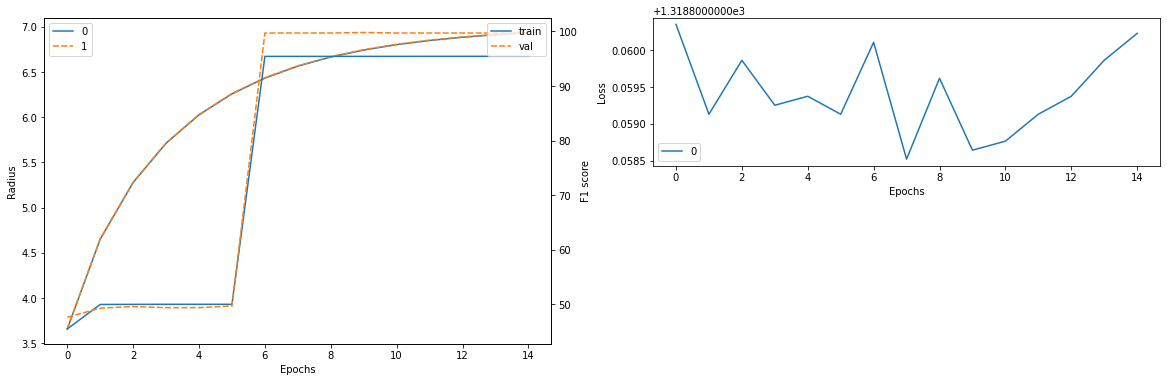

classification report for training:
[[4000    0    0]
 [   0 3330  670]
 [   0    0    0]]
91.62
f1_weighted: 0.9542974079126875, f1_macro: 0.6361982719417917, f1_micro: 0.91625, f_measure: {'Known': 95.4297, 'Open': 0, 'F1-score': 63.6198}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      0.83      0.91      4000
           7       0.00      0.00      0.00         0

    accuracy                           0.92      8000
   macro avg       0.67      0.61      0.64      8000
weighted avg       1.00      0.92      0.95      8000

classification report for test data:
[[493   0   0   0]
 [  0 496   0   0]
 [  0   0   0 163]
 [  0   0   0   0]]
85.85
f1_weighted: 0.8585069444444444, f1_macro: 0.5, f1_micro: 0.8585069444444443, f_measure: {'Known': 66.6667, 'Open': 0, 'F1-score': 50.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1

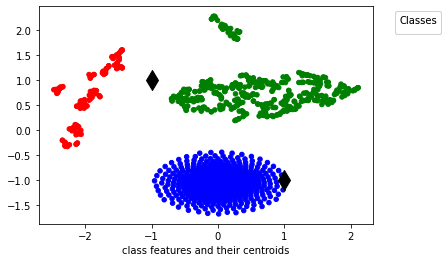

INFO:tensorflow:Assets written to: ram://f86e3e28-e2a7-491b-bdb4-c3a4571f58c0/assets


In [4]:
res = oset.train(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=True,                               
                                   pt_epochs=6, oc_epochs=50, tsne_n_iter=2000, tsne_perplexity=8)

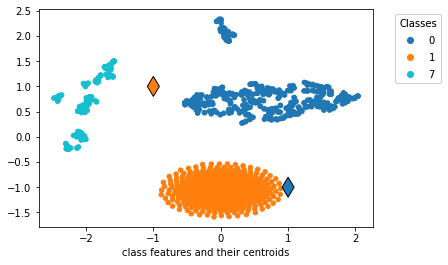

In [5]:
oset.plot_centroids(tsne_perplexity=8, tsne_n_iter=5000, use_labels=oset.total_preds, centroid_class_color=True)

In [6]:
# for i in range(100):
#     print(f'perplexity: {i}')
#     oset.plot_centroids(tsne_perplexity=i, tsne_n_iter=5000, use_labels=oset.total_preds, centroid_class_color=True)

In [7]:
# res = oset.train(train_data=train_data, val_data=val_data,
#                                     test_data=test_data, bglog=bglog, manual_color_map=True,                                 
#                                    pt_epochs=3, oc_epochs=10, ptmodel_get_mode='import',                 
#                 )

In [8]:
# res = oset.train(train_data=train_data, val_data=val_data,
#                                     test_data=test_data, bglog=bglog,                                 
#                                    pt_epochs=3, oc_epochs=10, ptmodel_get_mode='import',  
#                  manual_color_map=False, centroid_class_color=True,
#                 )

In [9]:
# plist = ['bg_class_obj', 'train_data', 'val_data', 'test_data', 'bglog']
# for i in plist:
#     oset.tracker.pop(i)

In [10]:
# s = oset.update_tracker('mytest.xlsx', oset.tracker )

In [11]:
# import pickle
# f = pickle.dumps(oset)